

### Advanced Machine Learning

# Trees, Forests &amp; Ensembles and Model evaluation

05/04/21

Jonathan Schler

(credit: Columbia Univ - 4995 - Machine Learning Course)


In [123]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,
                                                    stratify=cancer.target,
                                                    random_state=0)

#cancer.target
cancer.data.shape

(569, 30)

# Decision Tree - why?

# Decision Tree - why?

- Very powerful modeling method – non-linear!
- Doesn’t care about scaling of distribution of data!
- “Interpretable”
- Basis of very powerful models!
 

# Decision Trees for Classification
## Idea: series of binary questions

<center>
<img src="./images/tree_illustration.png" style="width: 600px;">
</center>

## Building  a Tree

<center>
<img src="./images/tree_building_iteration_1.png" style="width: 600px;">
</center>

## Building  a Tree - step 2

<center>
<img src="./images/tree_building_iteration_2.png" style="width: 600px;">
</center>

## Building  a Tree - continued

<center>
<img src="./images/tree_building_iteration_9.png" style="width: 600px;">
</center>

## Criteria (for classification)
 - Gini Index:

$$H_\text{gini}(X_m) = \sum_{k\in\mathcal{Y}} p_{mk} (1 - p_{mk})$$

 - Cross-Entropy:

$$H_\text{CE}(X_m) = -\sum_{k\in\mathcal{Y}} p_{mk} \log(p_{mk})$$


$X_m$ observations in node m

$\mathcal{Y}$ classes

$p_{m\cdot}$ distribution over classes in node m

## Prediction 

<center>
<img src="./images/tree_prediction.png" style="width: 600px;">
</center>

- Traverse tree based on feature tests
- Predict most common class in leaf


In [124]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)
y_pred=tree.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0])

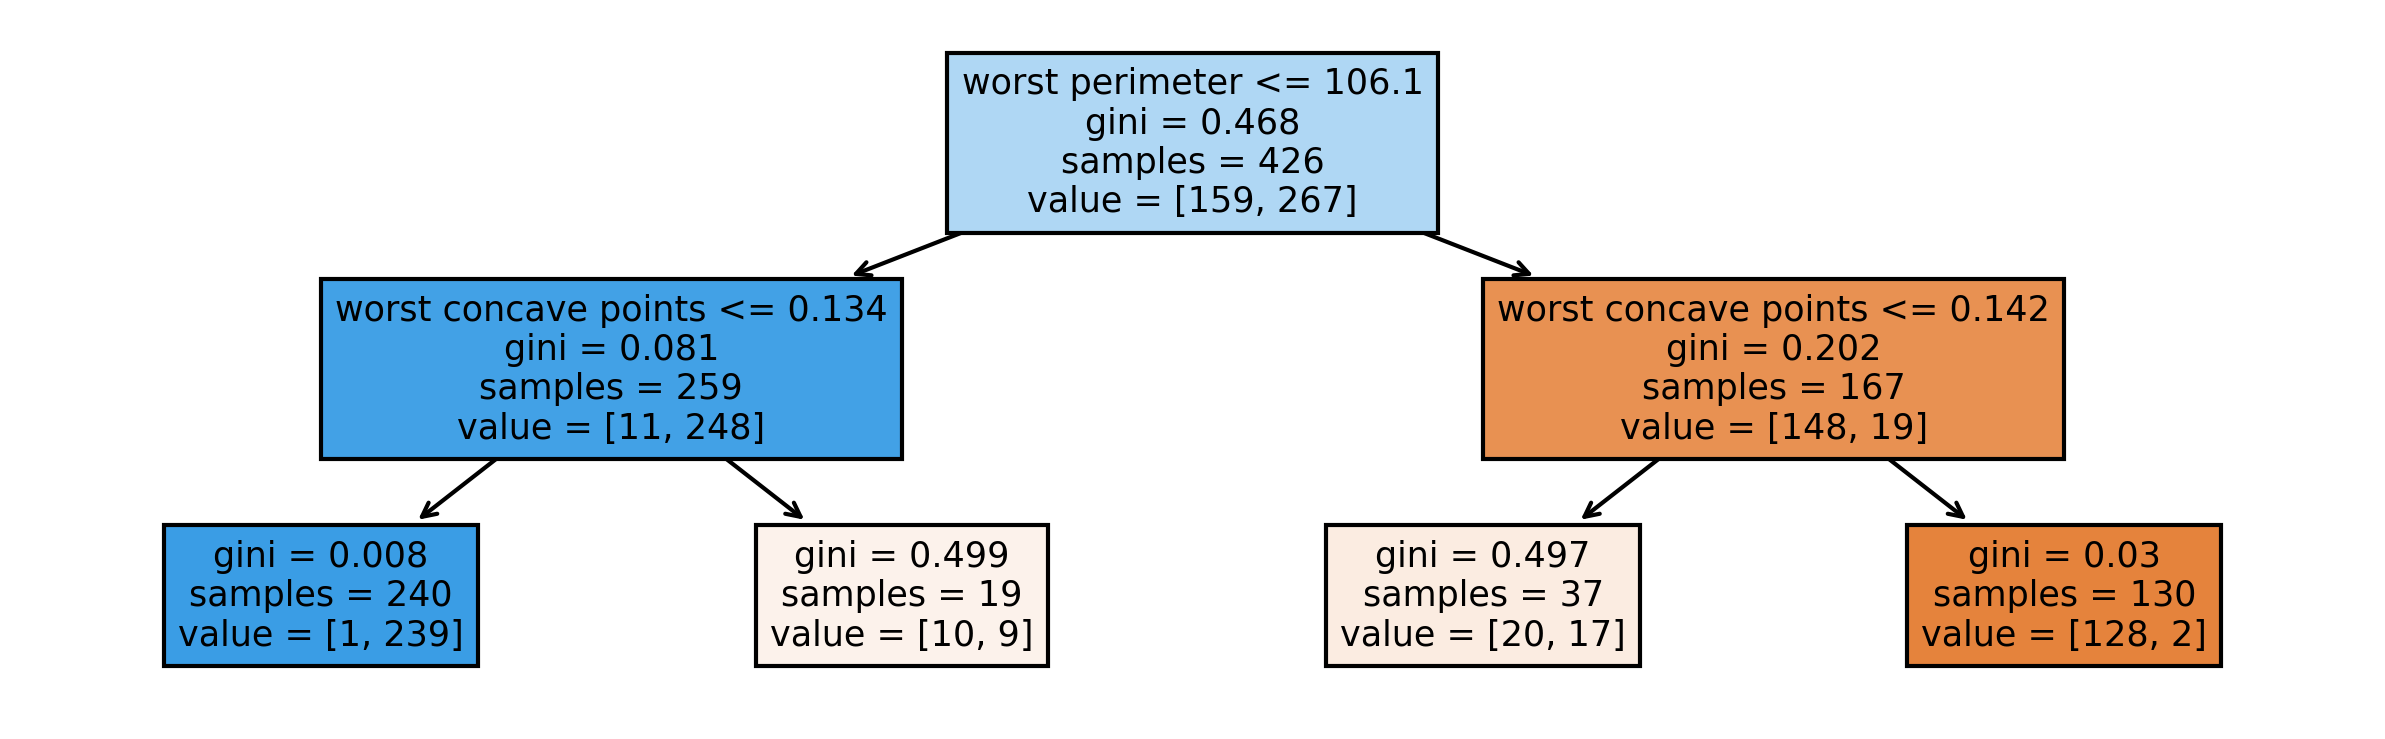

In [126]:
#visualizing trees
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 3), dpi=300)
tree_dot = plot_tree(tree, feature_names=cancer.feature_names,filled=True)
#tree_dot = plot_tree(tree, feature_names=cancer.feature_names)

## Parameter Tuning

- Pre-pruning vs post-pruning

- Pre-pruning: Limit tree size (pick one, maybe two):

  - max_depth

  - max_leaf_nodes

  - min_samples_split

  - min_impurity_decrease

  - ...

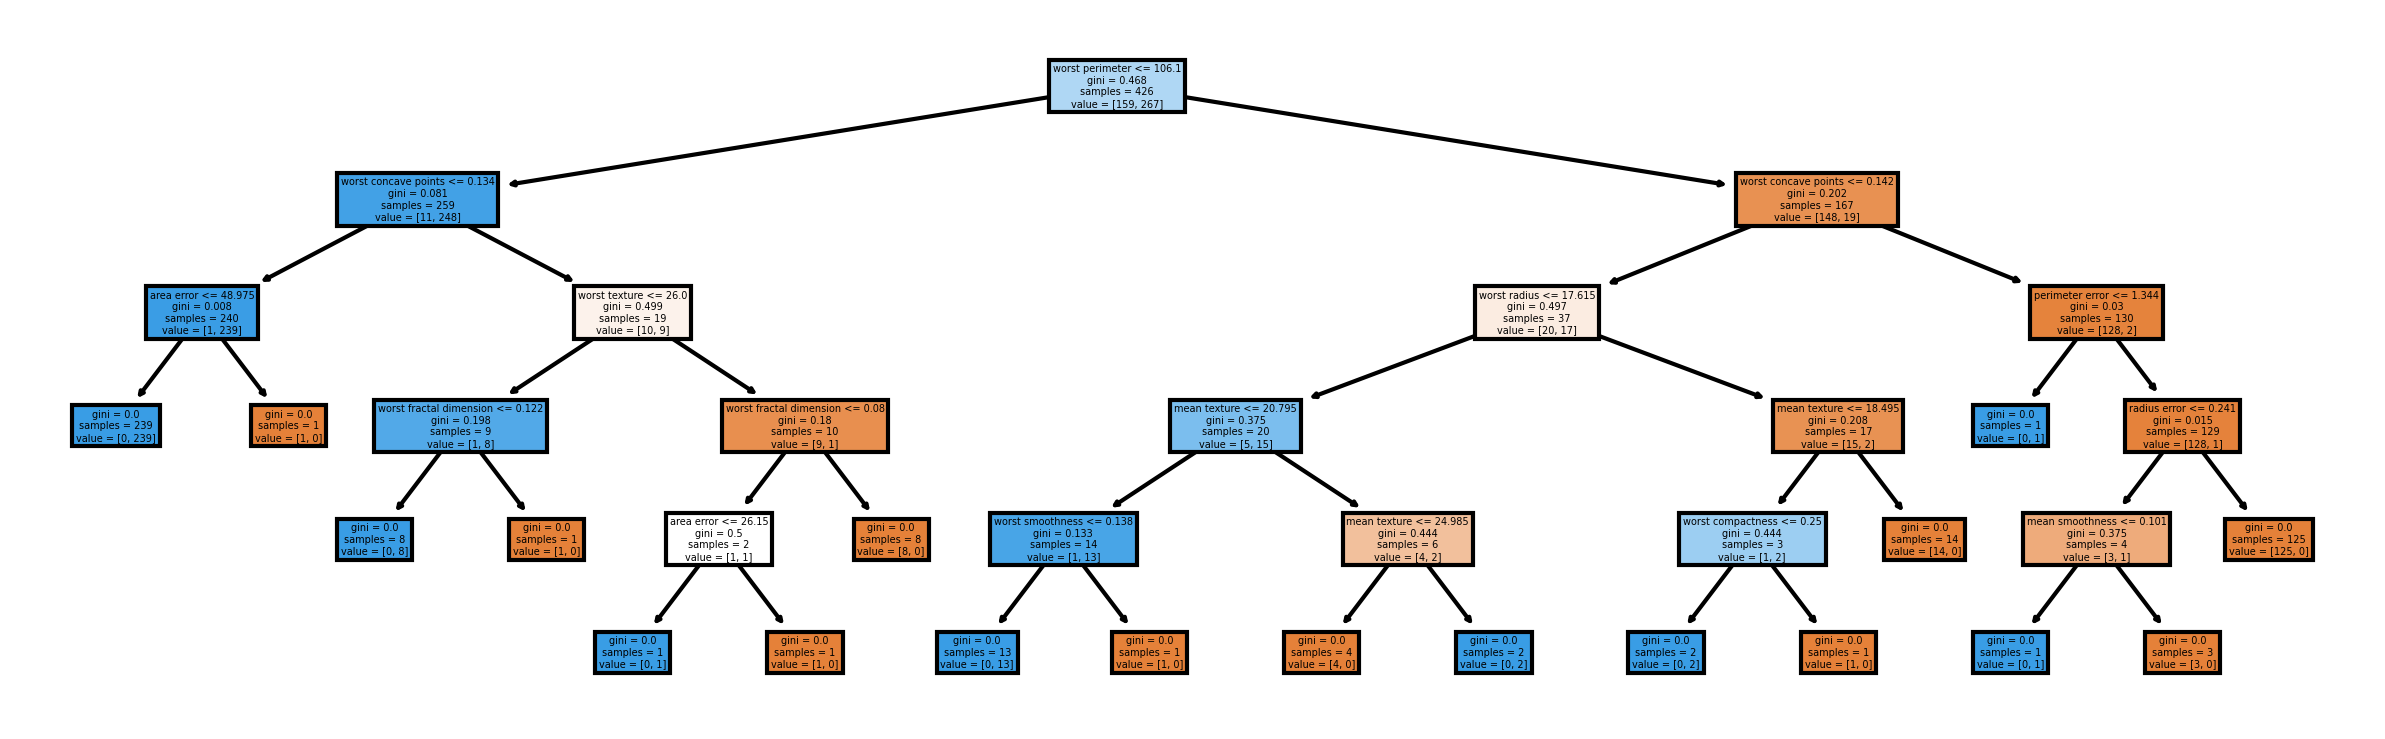

In [127]:
# no pruning
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

plt.figure(figsize=(10, 3), dpi=300)
tree_dot = plot_tree(tree, feature_names=cancer.feature_names,filled=True)

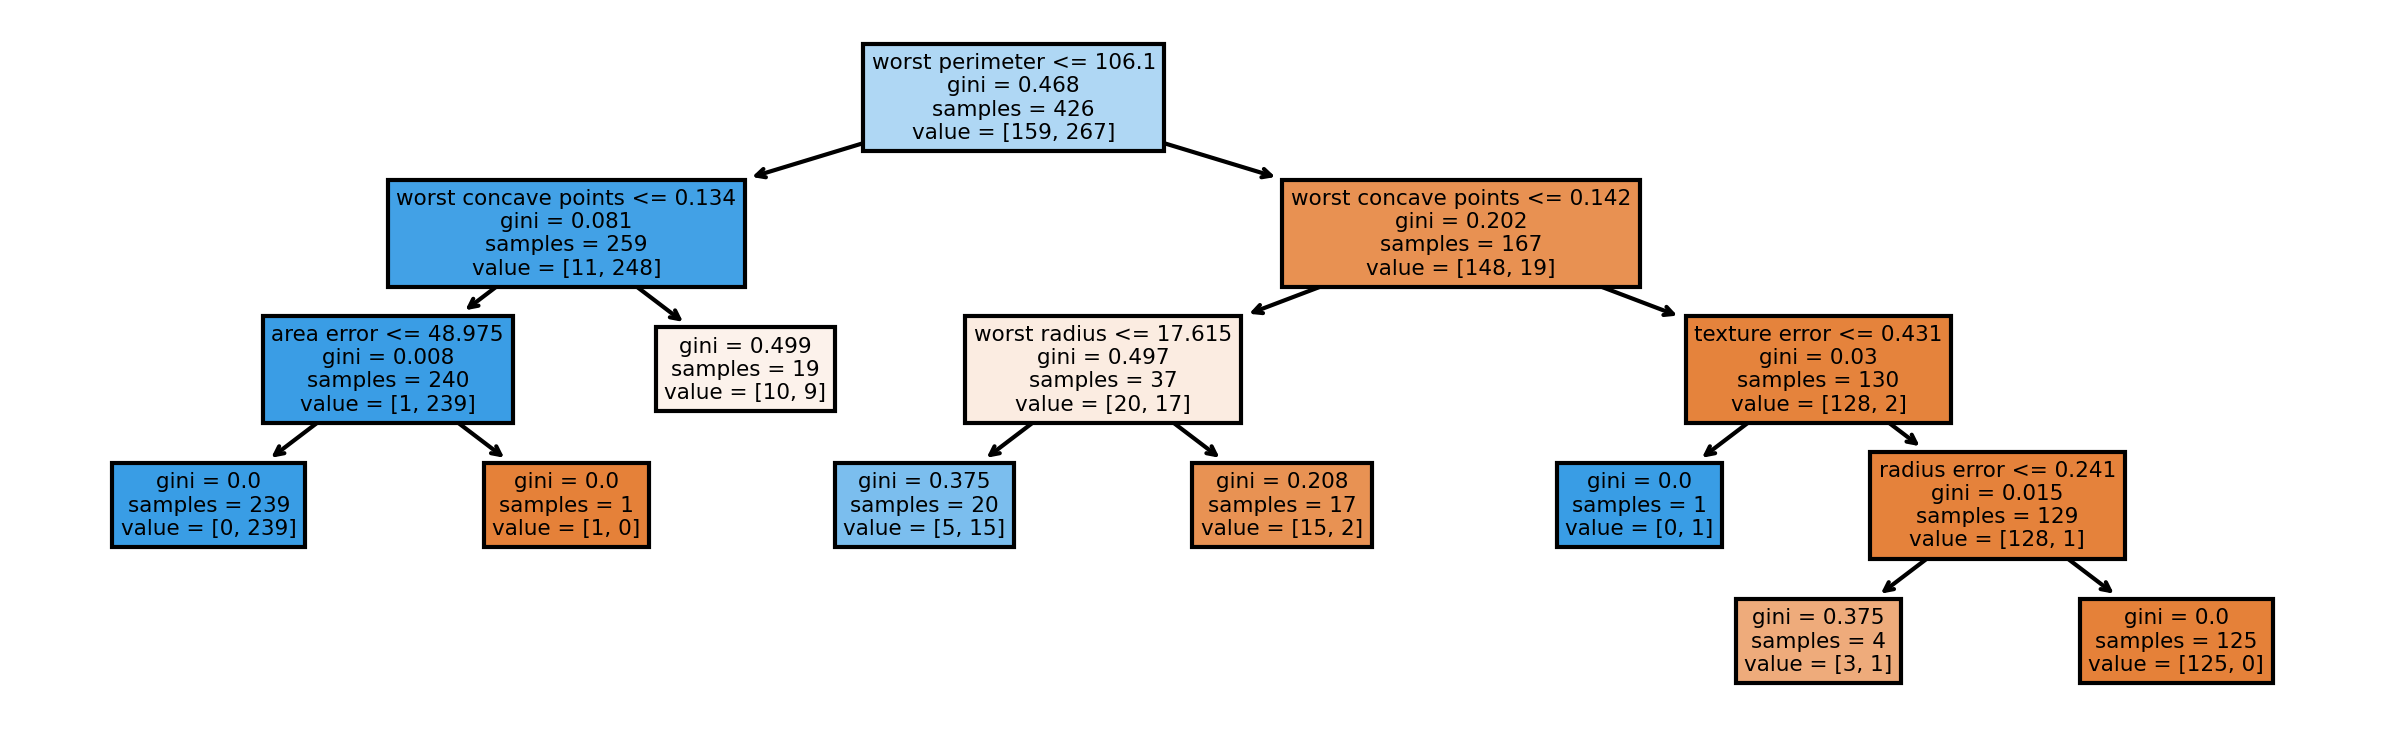

In [128]:
# some pruning
tree = DecisionTreeClassifier(min_samples_split=25)
tree.fit(X_train, y_train)

plt.figure(figsize=(10, 3), dpi=300)
tree_dot = plot_tree(tree, feature_names=cancer.feature_names,filled=True)

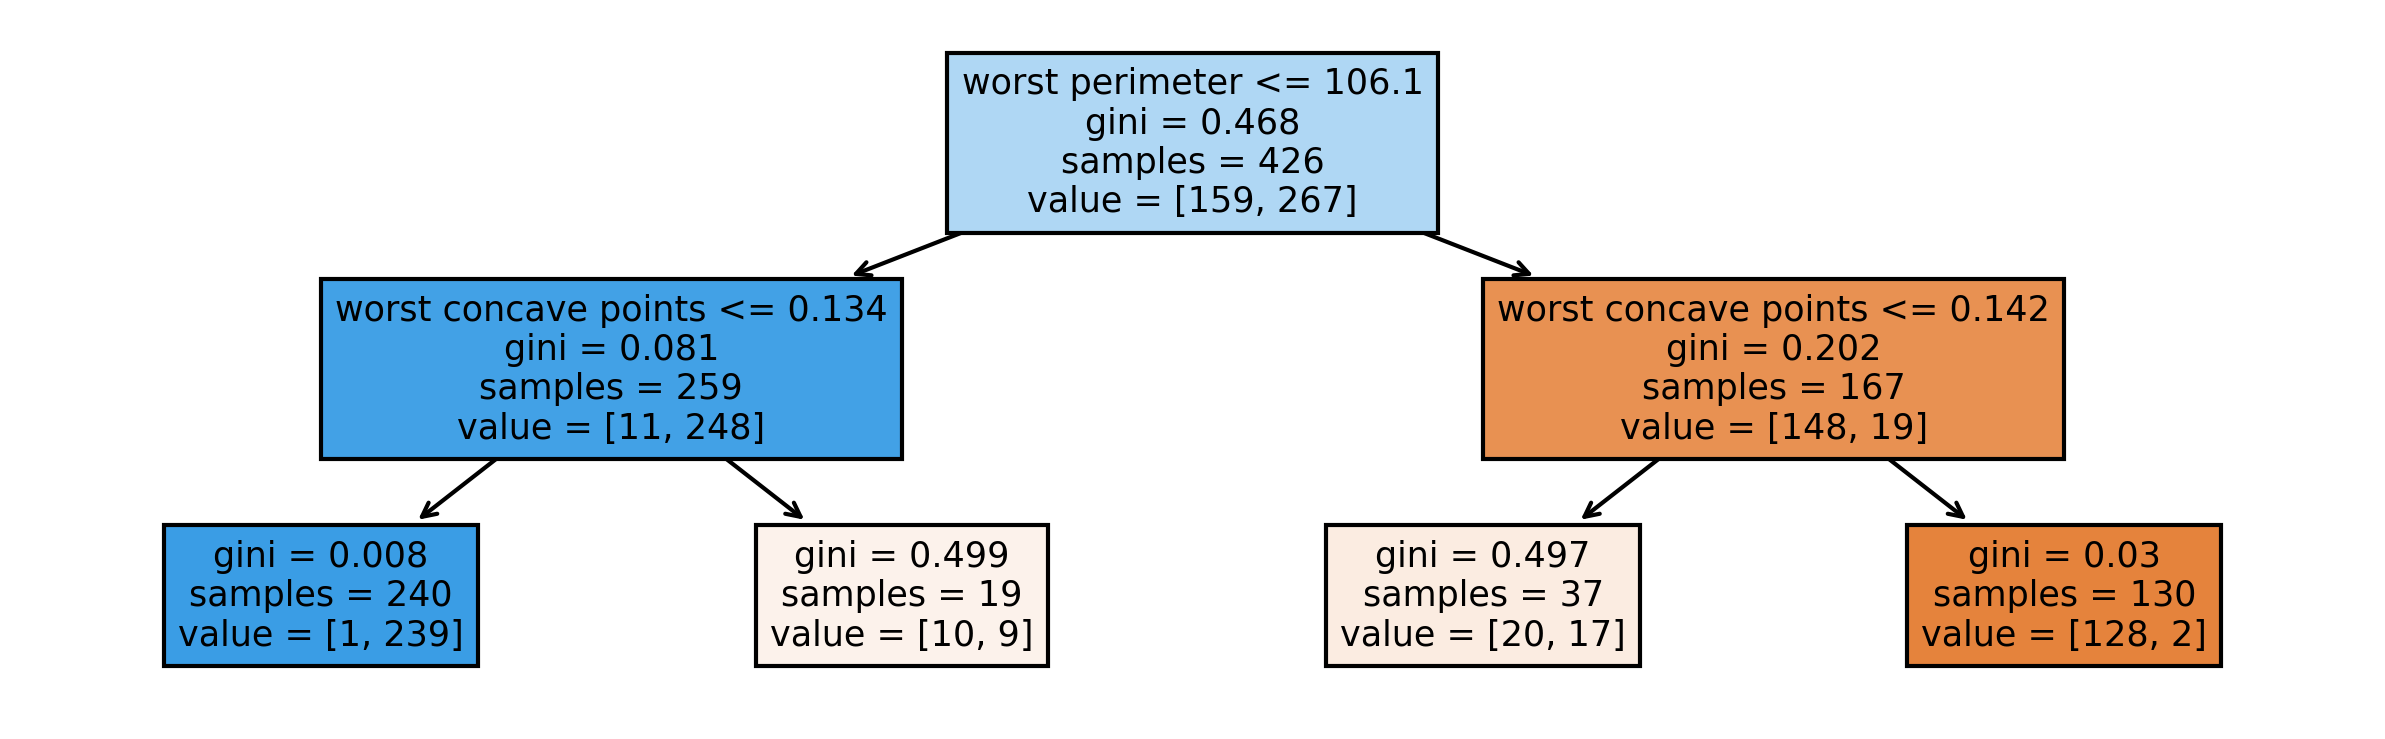

In [131]:
# some other pruning
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

plt.figure(figsize=(10, 3), dpi=300)
tree_dot = plot_tree(tree, feature_names=cancer.feature_names,filled=True)

## Categorical Data

- Can split on categorical data directly
- Intuitive way to split: split in two subsets
- 2 ^ n_values many possibilities
- Heuristics done in practice for multi-class.
- Not in sklearn yet
- how to handle missing data?

## Predicting probabilities
- Fraction of class in leaf.
- Without pruning: Always 100% certain!
- Even with pruning might be too certain.

# Ensemble Models


## Poor man’s ensembles

- Build different models
- Average the result
- Owen Zhang (long time kaggle 1st): build XGBoosting models with different random seeds.
- More models are better – if they are not correlated.
- Also works with neural networks
- You can average any models as long as they provide calibrated (“good”) probabilities.
- Scikit-learn: VotingClassifier hard and soft voting


In [132]:
# build different models..
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(
    [('logreg', LogisticRegression(C=.01)),
     ('tree', DecisionTreeClassifier(max_depth=3, random_state=0))],
    voting='soft')
voting.fit(X_train, y_train)
lr, tree = voting.estimators_
tree.score(X_test, y_test), lr.score(X_test, y_test), voting.score(X_test, y_test)

/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(0.916083916083916, 0.9230769230769231, 0.9370629370629371)

# Randomize in two ways - option A

- For each tree:
     - Pick bootstrap sample of data


- More trees are always better


<center>
<img src="./images/bootstrap_sample.png" style="width: 600px;">
</center>



# Randomize in two ways - option B

- For each feature:
     - Pick subest of features


- More trees are always better


<center>
<img src="./images/feature_sample.png" style="width: 600px;">
</center>


# Tuning Random Forests

- Main parameter: max_features
  - around sqrt(n_features) for classification

- n_estimators > 100
- Prepruning might help, definitely helps with model size!
- max_depth, max_leaf_nodes, min_samples_split again


## What did we see so far?
- Trees classifier
- Visualization
- Simple, explainable, works well on variety of data, provides probability
- Tendency for overfit
- Ensembles to overcome: voting, bagging, boosting
- RandomForest



## Break 1


# Metrics for Binary Classification



# Review : confusion matrix


<center>
<img src="./images/confusion_matrix.png" style="width: 600px;">
</center>

<br><br>
$$\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}$$



# Positive & Negative are arbitrary
## Though often the minority class is considered positive


[[48  5]
 [ 4 86]]
accuracy is 0.9370629370629371


/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


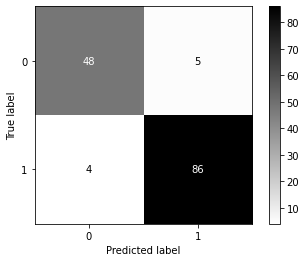

In [136]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, stratify=data.target, random_state=0)

lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(f"accuracy is {lr.score(X_test, y_test)}")
plot_confusion_matrix(lr, X_test, y_test, cmap='gray_r')



# Problems with Accuracy

What can be problematic with accuracy? 



<center>
<img src="./images/problems_with_accuracy.png" style="width: 600px;">
</center>





# Precision, Recall, f-score
$$ \large\text{Precision} = \frac{\text{TP}}{\text{TP}+\text{FP}}   $$ <br /> 
$$\large\text{Recall} = \frac{\text{TP}}{\text{TP}+\text{FN}}$$<br />
$$\large\text{F} = 2 \frac{\text{precision} \cdot\text{recall}}{\text{precision}+\text{recall}}$$

other names:

- Precision = Positive Predicted Value (PPV)
- Recall = Sensitivity, coverage, true positive rate.
- F1 = Harmonic mean of precision and recall


In [140]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
# Normalizing the confusion matrix

print("regular confusion matrix")
print(confusion_matrix(y_test, y_pred))
print()

print("normalized confusion matrix (true)")
print(confusion_matrix(y_test, y_pred, normalize='true'))
print()

print("normalized confusion matrix (pred)")
print(confusion_matrix(y_test, y_pred, normalize='pred'))

print(f"precision {precision_score(y_test, y_pred)}")
print(f"recall {recall_score(y_test, y_pred)}")

regular confusion matrix
[[48  5]
 [ 4 86]]

normalized confusion matrix (true)
[[0.90566038 0.09433962]
 [0.04444444 0.95555556]]

normalized confusion matrix (pred)
[[0.92307692 0.05494505]
 [0.07692308 0.94505495]]
precision 0.945054945054945
recall 0.9555555555555556


In [141]:
# another way to summerize it all
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.95      0.96      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143




# Averaging strategies

$$\text{macro }\frac{1}{\left|L\right|} \sum_{l \in L} R(y_l, \hat{y}_l)$$

$$\text{weighted } \frac{1}{n} \sum_{l \in L} n_l R(y_l, \hat{y}_l)$$




In [142]:
from sklearn.metrics import recall_score

print("Weighted average: ", recall_score(y_test, y_pred, average="weighted"))
print("Macro average: ", recall_score(y_test, y_pred, average="macro"))



Weighted average:  0.9370629370629371
Macro average:  0.930607966457023



# Mammography Data



In [143]:
from sklearn.datasets import fetch_openml
# mammography https://www.openml.org/d/310
data = fetch_openml('mammography', as_frame=True)
X, y = data.data, data.target
print(X.shape)

print(y.value_counts())

(11183, 6)
-1    10923
1       260
Name: class, dtype: int64


In [148]:
# make y boolean
# this allows sklearn to determine the positive class more easily
X_train, X_test, y_train, y_test = train_test_split(X, y == '1', random_state=0)


In [149]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


svc = make_pipeline(StandardScaler(),
                    SVC(C=100, gamma=0.15))
svc.fit(X_train, y_train)
print(f"svc: {svc.score(X_test, y_test)}")

rf = RandomForestClassifier()

rf.fit(X_train, y_train)
print(f"rf: {rf.score(X_test, y_test)}")


svc: 0.9878397711015737
rf: 0.9874821173104434


In [150]:
print(classification_report(y_test, svc.predict(X_test)))
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

       False       0.99      1.00      0.99      2732
        True       0.84      0.58      0.69        64

    accuracy                           0.99      2796
   macro avg       0.92      0.79      0.84      2796
weighted avg       0.99      0.99      0.99      2796

              precision    recall  f1-score   support

       False       0.99      1.00      0.99      2732
        True       0.91      0.50      0.65        64

    accuracy                           0.99      2796
   macro avg       0.95      0.75      0.82      2796
weighted avg       0.99      0.99      0.99      2796




# Goal setting!
- What do I want? What do I care about? 
- Can I assign costs to the confusion matrix?
- What guarantees do we want to give?



# Changing Thresholds




In [154]:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print("=================")
y_pred = rf.predict_proba(X_test)[:, 1] > .20
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.99      1.00      0.99      2732
        True       0.91      0.50      0.65        64

    accuracy                           0.99      2796
   macro avg       0.95      0.75      0.82      2796
weighted avg       0.99      0.99      0.99      2796

              precision    recall  f1-score   support

       False       0.99      0.99      0.99      2732
        True       0.63      0.73      0.68        64

    accuracy                           0.98      2796
   macro avg       0.81      0.86      0.83      2796
weighted avg       0.99      0.98      0.98      2796



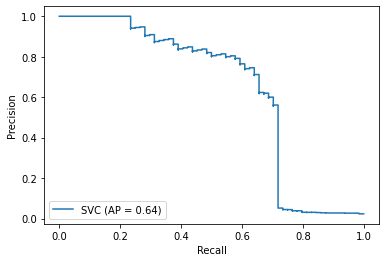

In [155]:
from sklearn.metrics import plot_precision_recall_curve, precision_recall_fscore_support


svc = make_pipeline(StandardScaler(), SVC(C=100, gamma=0.1))
svc.fit(X_train, y_train)
plot_precision_recall_curve(svc, X_test, y_test, name='SVC')


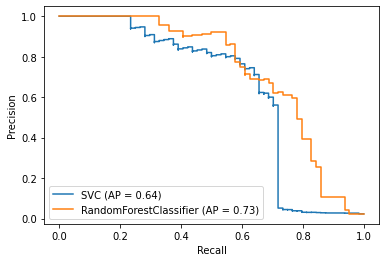

In [156]:
pr_svc = plot_precision_recall_curve(svc, X_test, y_test, name='SVC')
pr_rf = plot_precision_recall_curve(rf, X_test, y_test, ax=plt.gca())



## Average Precision


<center>
<img src="./images/avg_precision.png" style="width: 600px;">
</center>

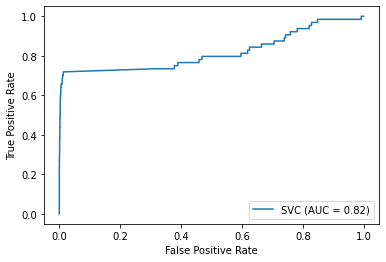

In [157]:
# ROC Curve

from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc, X_test, y_test, name='SVC')



## Area Under ROC Curve (aka AUC)

<center>
<img src="./images/roc_curve_svc_auc.png" style="width: 600px;">
</center>

- Always .5 for random/constant prediction


## Summary ROC vs PR curves

- ROC curves are appropriate when the observations are balanced between each class,
- precision-recall curves are appropriate for imbalanced datasets.



## Further reading on evaluation curves

- [The Relationship Between Precision-Recall and ROC Curves](https://www.biostat.wisc.edu/~page/rocpr.pdf)
- [Precision-Recall-Gain Curves: PR Analysis Done Right](https://papers.nips.cc/paper/5867-precision-recall-gain-curves-pr-analysis-done-right.pdf)





# Summary of metrics for binary classification

Threshold-based:
- (balanced) accuracy
- precision, recall, f1

Ranking:
- average precision
- ROC AUC



# Multi-class classification

/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 0.962


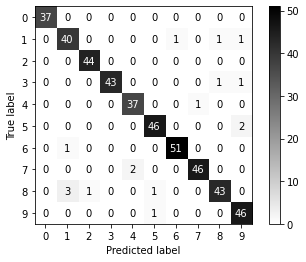

In [158]:
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

digits = load_digits()
 # data is between 0 and 16
X_train, X_test, y_train, y_test = train_test_split(
    digits.data / 16., digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
plot_confusion_matrix(lr, X_test, y_test, cmap='gray_r')


In [159]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      1.00      0.99        44
           3       1.00      0.96      0.98        45
           4       0.95      0.97      0.96        38
           5       0.96      0.96      0.96        48
           6       0.98      0.98      0.98        52
           7       0.98      0.96      0.97        48
           8       0.96      0.90      0.92        48
           9       0.92      0.98      0.95        47

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450




# Multi-class ROC AUC
- Hand &amp; Till, 2001, one vs one
$$ \frac{1}{c(c-1)}\sum_{j=1}^{c}\sum_{k \neq j}^{c} AUC(j,k)$$
- Provost &amp; Domingo, 2000, one vs rest
$$ \frac{1}{c}\sum_{j=1}^{c}p(j) AUC(j,\text{rest}_j)$$


# Summary of metrics for multiclass classification

Threshold-based:
- accuracy
- precision, recall, f1 (macro average, weighted)

Ranking:
- OVR ROC AUC
- OVO ROC AUC




# Picking metrics

- Accuracy rarely what you want
- Problems are rarely balanced
- Find the right criterion for the task
- OR pick a substitude, but at least think about it
- Emphasis on recall or precision?
- Which classes are the important ones?





### Metrics for regression models (just for completeness) (side note)

- $\text{R}^2$ : easy to understand scale
- MSE : easy to relate to input
- Mean absolute error, median absolute error: more robust

In [170]:
# Using metrics in cross-validation

from sklearn.model_selection import cross_val_score

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# default scoring for classification is accuracy
rf = RandomForestClassifier(random_state=0)
print("default scoring ", cross_val_score(rf, X, y))

# providing scoring="accuracy" doesn't change the results
explicit_accuracy =  cross_val_score(rf, X, y,  scoring="accuracy")
print("explicit accuracy scoring ", explicit_accuracy)

ap =  cross_val_score(rf, X, y, scoring="average_precision")
print("average precision", ap)



default scoring  [0.92982456 0.94736842 0.99122807 0.97368421 0.97345133]
explicit accuracy scoring  [0.92982456 0.94736842 0.99122807 0.97368421 0.97345133]
average precision [0.99180967 0.97278296 0.99944444 0.99521914 0.99903777]


In [171]:

# Multiple Metrics
import pandas as pd
from sklearn.model_selection import cross_validate
res = cross_validate(RandomForestClassifier(), X, y,
                     scoring=["accuracy", "average_precision",
                     "recall_macro"],
                     return_train_score=True, cv=5)
pd.DataFrame(res)


,fit_time,score_time,test_accuracy,train_accuracy,test_average_precision,train_average_precision,test_recall_macro,train_recall_macro
0,0.236808,0.027503,0.921053,1.0,0.993274,1.0,0.918277,1.0
1,0.222332,0.022742,0.947368,1.0,0.972218,1.0,0.934818,1.0
2,0.217782,0.021959,0.991228,1.0,0.999625,1.0,0.993056,1.0
3,0.235578,0.031429,0.973684,1.0,0.994178,1.0,0.969246,1.0
4,0.222512,0.019307,0.964602,1.0,0.999038,1.0,0.962106,1.0


In [172]:
## Built-in scoring

from sklearn.metrics import SCORERS
print("\n".join(sorted(SCORERS.keys())))


accuracy
adjusted_mutual_info_score
adjusted_rand_score
average_precision
balanced_accuracy
completeness_score
explained_variance
f1
f1_macro
f1_micro
f1_samples
f1_weighted
fowlkes_mallows_score
homogeneity_score
jaccard
jaccard_macro
jaccard_micro
jaccard_samples
jaccard_weighted
max_error
mutual_info_score
neg_brier_score
neg_log_loss
neg_mean_absolute_error
neg_mean_gamma_deviance
neg_mean_poisson_deviance
neg_mean_squared_error
neg_mean_squared_log_error
neg_median_absolute_error
neg_root_mean_squared_error
normalized_mutual_info_score
precision
precision_macro
precision_micro
precision_samples
precision_weighted
r2
recall
recall_macro
recall_micro
recall_samples
recall_weighted
roc_auc
roc_auc_ovo
roc_auc_ovo_weighted
roc_auc_ovr
roc_auc_ovr_weighted
v_measure_score




# Providing you your own scorer (if you really want..)
- Takes estimator, X, y
- Returns score – higher is better (always!)
```python
def accuracy_scoring(est, X, y):
        return (est.predict(X) == y).mean()
```


# Questions ?

    